# Introduction

Optimzation is an incredibly diverse field that goes from very theoretical math to very applied applications. But they all rest on the same beginning. The idea with optimization is that we have some goal, call it $G$ and we want to try to find the optimal value $x$ that minimizes (or maximizes) that goal. This is typically written as such
$$\arg\min_x\ G(x)$$

Importantly, this goal can be anything, for example one important use of optimization is how to get from point A to point B as fast as you can. In this case $x$ will be the different routes that one can take from A to B, and $G$ will be the time taken. So
$$G(x) = \textrm{Time taken to go from Point A to Point B using the route}\ x$$
Now this problem is known as the "Shortest path problem" and has been solved in many ways: Dijkstra's algorithm, Bellman-Ford, A*, etc.


Really what interests us is where $x$ is the parameters of the model and $G$ is the validation (or CV) error
$$G(x) = \textrm{Validation error of a model with the parameters}\ x$$

# Continous Problems

One of the most simpliest optimization problems to slove is when $G(x)$ is continuous, and therefore it's derivative $G'(x)$ exists. 

### Simple Example - Classic 1st Year Calculus Example

Find the dimensions of a rectangle such that it has the maximum area with a given perimeter of 10cm. In this case 
$$G(l, w) = \textrm{Area of the rectangle that has a width of}\ w\ \textrm{and height of}\ l$$
$$\textrm{On the condition that}\ 2l+2w=10$$

Optimizing this is simple, since $2l+2w=10\implies l+w=5\implies w=5-l$
$$G=lw=l(5-l)=5l-l^2$$
Which is continuous and we can take the derivative of this:
$$G'=5-2l=0\implies l=\frac{5}{2}=2.5$$
Therefore the optimal length and width is $l=2.5$, and $w=2.5$

### Quick Aside

Just to give some background, I have an undergraduate in applied mathematics so I have taken courses on "optimization". Time after time I am always disappointed by these courses, because while they do teach you optimization, it is always optimization on the most contrived, non-realistic examples that no-one will ever use in the real world.

So the question I gave you before typically is shown as a a farmer who has 10km of fencing and they want to make an area as big as they can. BUT WHO CARES. Or they will give you an incredibly non-realistic example that will only exist in fantasy.

The big issue that these problems all have is that the loss function is continuous and the derivative is easy to solve. But there are many situations, and even very simply situations, where you have a continuous function but the derivative is not so easy to solve. So what do you do then?

### More Complex Example - Portfolio Optimization

Let us consider portfolio optimization (Note that if you really care about portfolio optimization then what I'm doing here is very very inefficient. You should look at the Efficient Frountier if you really care about portfolio optimization).

The aim of portfolio optimization is to maximize the returns of our portfolio, while minimizing the volatility. In math terms we can write this as

$$G=\mu - \alpha \sigma^2$$
where $\mu$ is the average returns of the portfolio and $\sigma^2$ is the variance of the portfolio. And we want to maximize $G$. $\alpha$ can be thought of as the risk tolerance (and regularization of sorts). If $\alpha=0$ then all we care about is $G=\mu$ and therefore we only care about maximizing the returns.

If we think back to regularization, when $\alpha=0$ (i.e. the regularization strentgh = 0) then the model is overfitting. In portfolio optimization overfitting is maximizing returns. When $\alpha$ gets bigger, (i.e. the regularization strength increase) we expect models to underfit. In the same sense, we should expect the portfolio returns to be smaller, but the volatility is also smaller as well.

Now when $\alpha>0$ it means that we want to care about the volatility, and so we want to find the optimal returns at a given level of volatility. So $\alpha$ can be thought of as the risk tolerance, when $\alpha$ is small we have a high risk tolerance (we only care about returns), but when $\alpha$ is big we have a very low risk tolerance. 

But the main goal in portfolio optimization is to say, given a risk tolerance $\alpha$ what is the optimal returns of my portfolio.

Keeping it simple, consider my portfolio consisted of only 2 stocks, where $r_1^t$ is the returns of asset 1 at time $t$ and $r_2^t$ is the returns of asset 2 at time $t$. Let $w\in[0,1]$ be the weighting of asset 1, and therefore $1-w$ is the weighting of asset 2. (For example if $w=0.2$ then the portfolio consists of $20\%$ asset 1 and $80\%$ asset 2.

Then the portfolio returns at time $t$
$$R_t=wr_1^t + (1-w)r_2^t$$

So we want to maximize
$$G = \mu - \alpha \sigma^2$$
Where 
$$\mu=\frac{1}{T}\sum_{t=1}^TR_t \quad \sigma^2=\frac{1}{T}\sum_{t=1}^T (R_t-\mu)^2$$

Following from before, we can just take the derivative of $G$ with respect to the weight $w$.

$$\frac{\partial G}{\partial w}=\frac{\partial \mu}{\partial w}-\alpha\frac{\partial \sigma^2}{\partial w}$$


Now 
$$\frac{\partial \mu}{\partial w}=\frac{1}{T}\sum_t\frac{\partial R_t}{\partial w}=\frac{1}{T}\sum_t(r_1^t-r_2^t)$$

Likewise, by using the chain rule
$$\frac{\partial \sigma^2}{\partial w}=\frac{2}{T}\sum_t(R_t - \mu)\bigg(\frac{\partial R_t}{\partial w} - \frac{\partial \mu}{\partial w}\bigg)=\frac{2}{T}\sum_t (R_t-\mu)(r_1^t-r_2^t-\frac{\partial \mu}{\partial w})$$

So in total

$$\frac{\partial G}{\partial w} = \frac{1}{T}\sum_t(r_1^t-r_2^t) - \alpha \bigg[\frac{2}{T}\sum_t (R_t-\mu)(r_1^t-r_2^t-\frac{\partial \mu}{\partial w})\bigg]$$

This is a horrible expression to try and I dare you to try and solve it equal to 0. So we do something else instead.

Just to recap, here we have a problem where we can take the derivative with respect to the inputs. But the problem is that solving
$$\frac{\partial G}{\partial w}=0$$
is just too difficult. So this is a situation where the gradients exists, but too diffcult to solve. So instead we do something different, we will use gradient descent.

As an aside, I use TensorFlow because that was what was popular when I started machine learning like 6 years ago. But now people like to use PyTorch, so don't use TensorFlow, use PyTorch. Don't be like me.

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import yfinance as yf
import datetime

In [2]:
start = datetime.date(2020, 1, 1)
end = datetime.date(2021, 1, 1)

ticker = yf.Tickers("MSFT AAPL")
close_history = ticker.history(start=start, end=end)["Close"]

returns = np.log(close_history).diff().dropna(axis=0)

[*********************100%***********************]  2 of 2 completed


In [3]:
returns.head()

,AAPL,MSFT
Date,,
2020-01-02,0.022560,0.018347
2020-01-03,-0.009770,-0.012530
2020-01-06,0.007937,0.002581
2020-01-07,-0.004714,-0.009160
2020-01-08,0.015958,0.015803


This is how you compute gradients using tensorflow.

In [4]:
alpha = 10
w = tf.constant(0.0)
with tf.GradientTape() as g:
    g.watch(w)
    
    R_t = w * returns["MSFT"] + (1 - w) * returns["AAPL"]
    mu = tf.reduce_mean(R_t)
    std = tf.reduce_mean((R_t - mu) ** 2)
    
    G = mu - alpha * std
    
dG_dw = g.gradient(G, w)
dG_dw

<tf.Tensor: shape=(), dtype=float32, numpy=0.002503504>

In [5]:
alpha = 10
learning_rate = 100

w = tf.constant(0.0)
history = []

for _ in range(1000):
    with tf.GradientTape() as g:
        g.watch(w)
                
        R_t = w * returns["MSFT"] + (1 - w) * returns["AAPL"]
        mu = tf.reduce_mean(R_t)
        std = tf.reduce_mean((R_t - mu) ** 2)

        G = mu - alpha * std

    dG_dw = g.gradient(G, w)
    
    # Note that we want to maximize G here, not minimize. 
    # -= will minimize the loss function while += will maximize
    w += learning_rate * dG_dw
    history.append(w.numpy())

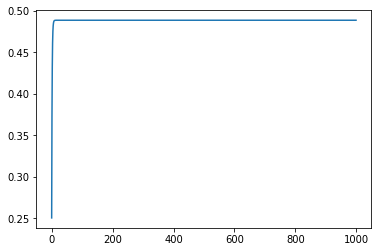

In [6]:
plt.plot(history);

In [7]:
history[-1]

0.4886049

So this is saying that the optimal weight for our portfolio is $w=0.488$, and this weight is the weight that will give the highest returns for the risk tolerance $\alpha=10$! How cool! We didn't even need to do complex math.

In [8]:
alpha = 1
learning_rate = 100

w = tf.constant(0.0)
history = []

for _ in range(1000):
    with tf.GradientTape() as g:
        g.watch(w)
                
        R_t = w * returns["MSFT"] + (1 - w) * returns["AAPL"]
        mu = tf.reduce_mean(R_t)
        std = tf.reduce_mean((R_t - mu) ** 2)

        G = mu - alpha * std

    dG_dw = g.gradient(G, w)
    
    w += learning_rate * dG_dw
    history.append(w.numpy())

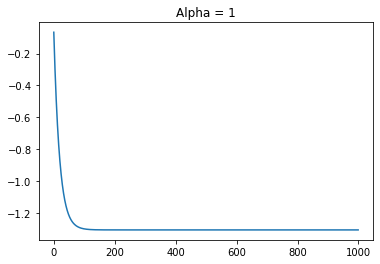

In [9]:
plt.plot(history)
plt.title(f"Alpha = {alpha}");

In [10]:
history[-1]

-1.3039778

Interesting, this is now saying that the optimal weight for the risk tolerance $\alpha=1$ is $w=-1.30$. Let's see why

In [4]:
# Optimal w for alpha=1
w = -1.3039778

mu = np.mean(w * returns["MSFT"] + (1 - w) * returns["AAPL"])
var = np.var(w * returns["MSFT"] + (1 - w) * returns["AAPL"])

print("Mean:", round(mu, 4))
print("Var :", round(var, 4))

Mean: 0.0037
Var : 0.0018


In [5]:
# Optimal w for alpha=10
w = 0.48860407

mu = np.mean(w * returns["MSFT"] + (1 - w) * returns["AAPL"])
var = np.var(w * returns["MSFT"] + (1 - w) * returns["AAPL"])

print("Mean:", round(mu, 4))
print("Var :", round(var, 4))

Mean: 0.0019
Var : 0.0008


Well first we can see that our optimization works as expected. When $\alpha$ increases (i.e. the risk tolerance) the variance of the portfolio decreases, but the returns also decrease as well.

But a negative weight basically means that we allow our portfolio to have short positions, which further increases the riskyness of the portfolio. But this can be fixed easily by re-writing the optimization problem as follows

Then the portfolio returns at time $t$
$$R_t=r_1^t + (1-w)r_2^t, \quad \textrm{where}\ w = \textrm{Sigmoid}(\theta).$$

So we want to maximize
$$G = \mu - \alpha \sigma^2$$
Where 
$$\mu=\frac{1}{T}\sum_{t=1}^TR_t \quad \sigma^2=\frac{1}{T}\sum_{t=1}^T (R_t-\mu)^2$$

Notice we just simply place an intermediate step $w=\textrm{Sigmoid}(\theta)$. But this intermediate step ensures that $w\in(0,1)$ and is not negative. But the important thing here is that rather than taking the derivative with respect to $w$ we take the derivative with respect to $\theta$.

In [13]:
alpha = 10
learning_rate = 100

𝜃 = tf.constant(0.1)
history = []

for _ in range(1000):
    with tf.GradientTape() as g:
        g.watch(𝜃)
        
        w = tf.math.sigmoid(𝜃)
                
        R_t = w * returns["MSFT"] + (1 - w) * returns["AAPL"]
        mu = tf.reduce_mean(R_t)
        std = tf.reduce_mean((R_t - mu) ** 2)

        G = mu - alpha * std

    dG_d𝜃 = g.gradient(G, 𝜃)
    
    𝜃 += learning_rate * dG_d𝜃
    history.append(tf.math.sigmoid(𝜃).numpy())

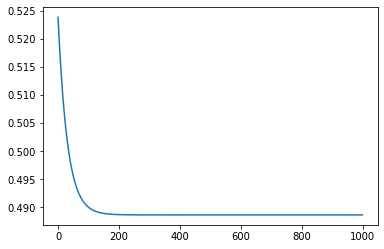

In [14]:
plt.plot(history);

In [15]:
history[-1]

0.48860517

This is good, because 0.488 was the exact same value as what we got before we did the intermediate step

In [20]:
alpha = 1
learning_rate = 300

𝜃 = tf.constant(0.1)
history = []

for _ in range(4000):
    with tf.GradientTape() as g:
        g.watch(𝜃)
        
        w = tf.math.sigmoid(𝜃)
                
        R_t = w * returns["MSFT"] + (1 - w) * returns["AAPL"]
        mu = tf.reduce_mean(R_t)
        std = tf.reduce_mean((R_t - mu) ** 2)

        G = mu - alpha * std

    dG_d𝜃 = g.gradient(G, 𝜃)
    
    𝜃 += learning_rate * dG_d𝜃
    history.append(tf.math.sigmoid(𝜃).numpy())

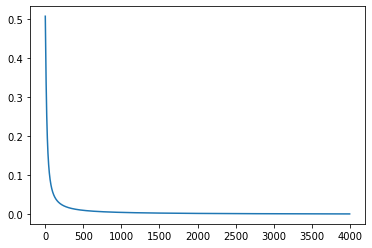

In [17]:
plt.plot(history);

In [18]:
history[-1]

0.0012576878

Basically this is saying that $w=0$, and so we only want asset 2 (AAPL) in our portfolio.

### Quick Note on Gradient Descent

Some of us my be familar with gradient descent and some might not, but it would be a good idea to just quickly go through the learning rate & number of steps as it will be important when it comes to gradient boosting and XGBoost. I won't go through too much of the reason, but there is a very important relationship between these two variables.

When the learning rate is high you expect convergence to the solution in a low number of steps. But if the learning rate is low, then you require a high number of steps. So they are opposites of each other. Importantly, there is a trade of that we must make:
- If the learning rate is high, then we are more quick to reach **near** the minimum. But because of how big the learning rate is, it is unlikely to actually reach the minimum
- If the learning rate is small, then it takes us longer to reach the minimum, but it is more likely to reach this minimum

In [48]:
alpha = 10

total_history = []
learning_rates = [1, 100, 400]

for learning_rate in learning_rates:
    # 𝜃 = tf.constant(0.1)
    w = tf.constant(0.5)
    history = []

    for _ in range(1000):
        with tf.GradientTape() as g:
            # g.watch(𝜃)
            # w = tf.math.sigmoid(𝜃)
            g.watch(w)

            R_t = w * returns["MSFT"] + (1 - w) * returns["AAPL"]
            mu = tf.reduce_mean(R_t)
            std = tf.reduce_mean((R_t - mu) ** 2)

            G = mu - alpha * std

        dG_dw = g.gradient(G, w)

        w += learning_rate * dG_dw
        history.append(w.numpy())
    
    total_history.append(np.array(history))

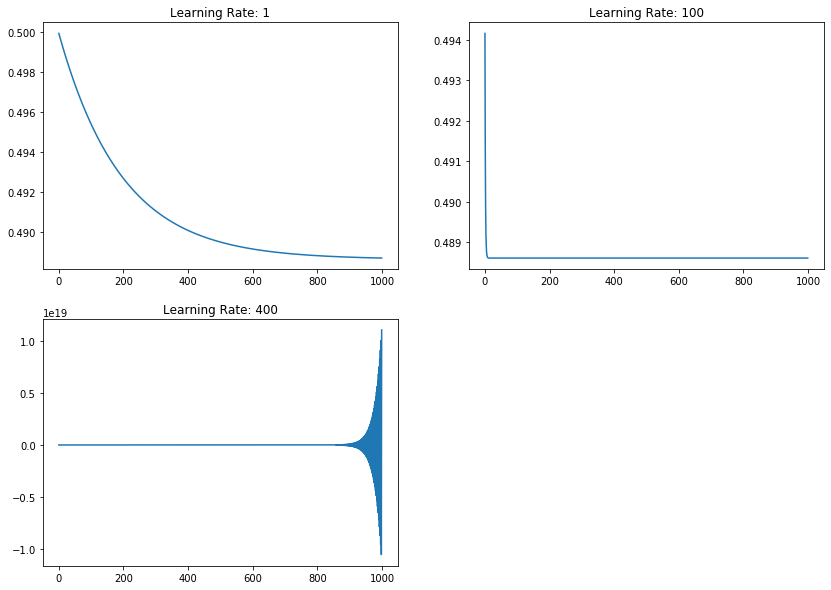

In [49]:
plt.figure(figsize=(14, 10))

for i in range(3):
    plt.subplot(2, 2, i + 1)
    plt.plot(total_history[i])
    plt.title(f"Learning Rate: {learning_rates[i]}")

This is not the best example to show the trade of using a high learning rate. But the main points are that when we fix the number of steps to be 1000

1. If the learning rate is too low (top left) then it may not converge
2. If the learning rate is too high (bottom left) then it may never converge
3. If the learning rate is correct (top right) then it may converge correctly

But the important thing here is that if we fix the learning rate then we effectively also fix the number of steps. Because if the learning rate is high then the optimal number of steps must be small. Similarly if the learning rate is low then the optimal number of steps must be high.

This becomes important to coordinate descent because we randomly initialize these values. So when we fix the learning rate (or the number of steps) we also fix the number of steps - because if the fixed learning rate is high it must be that the number of steps is low.

### Recap

So that is basically it for continuous optimization. There is a bit more I can talk about, like the differences between (stochastic) gradient descent vs. RMSProp vs. ADAM, as well as Newton's method. But that basically completes continuous optimization.

But just to quickly review what just happened. Let's say that we have a optimization problem $G(x)$ and we are lucky enough that $G$ has derivatives. Then
1. If we can solve $\partial G/\partial x=0$ then this is good. We have gauranted optimal solution.
2. However, as shown here, there are a lot of problems where this equation ($\partial G/\partial x=0$) cannot be solved. But since it's gradients exist we can use gradient descent to solve it. Of course, gradient descent has it's own problems, but I won't get into that here.

# Non-Continuous Problems

That's good and all, but what happens if the problem that I have has no derivatives. Going back to the introduction where the goal is to go from Point A to Point B as quick as you can, there is no way you can take the derivative with respect to the different paths. Another example is trying to find the best move in a Chess game, or a game like LOL. There is simply no way that these problems are continuous. 

So how do I solve this?

### The Key to Optimization
The key to all optimization is to exploit any information about the problem you have at hand. 

- In the case of continuous problems, we are going to exploit the fact that we can compute the derivatives. We will then use the derivatives to find the optimal solution
- In the case of the Shortest Path Problem, and optimal Chess/LOL move, you can exploit the fact that these can be modeled as graphs. Since these exists on a graph you can use things like Bellman-Ford, A*, etc. But that's not relevant to us here.

However, for this course we really are interested in find the hyper-parameters that give the best validation or CV error. The hyper-parameters are definetely not differentiable, nor do they exist on a graph. Really there is no information to exploit.

So the question is now, how do we optimize something where there is no information to exploit about them. To solve this we will look at meta-heuristic algorithms. Meta-heuristic algorithms simply try to optimize your loss function, but the key is that the make very little assumptions about the problem you are trying to solve. 

Because they make so little assumptions they can be used on a wide variety of problems. However, there is **no gaurantee** that the optimum solution can be found. As such, in theory, one can use meta-heuristics algorithms on continuous problems or even on the shortest path problem, but there is no gaurantee that the optimum solution can or will be found. In contrast, when we exploit the fact that gradients exist, or that the problem exists on a graph we can gaurantees on finding the optimum solution.

Regardless, taking from Wikipedia

    Metaheuristics sample a subset of solutions which is otherwise too large to be completely enumerated or otherwise explored.
    
    [M]etaheuristics can often find good solutions with less computational effort than optimization algorithms, iterative methods, or simple heuristics. As such, they are useful approaches for optimization problems
    
Just giving some examples of the algorithms they are comparing to
- Optimization Algorithms: Grid Search/Randomized Search
- Iterative Methods: Coordinate descent
- Simple Heuristics: Greedy search

Again from Wikipedia

    These are properties that characterize most metaheuristics:[3]
        - Metaheuristics are strategies that guide the search process.
        - The goal is to efficiently explore the search space in order to find near–optimal solutions.
        - Metaheuristic algorithms are approximate and usually non-deterministic.
        - Metaheuristics are not problem-specific.

The important point to highlight is that metaheuristic algorithms are non-deterministic. Meaning that when everytime you run the algorithm you may actually get different results. This is because, at least for the algoithms that we will look at, there is a level of randomness that is inherent to these algorithms.

Regardless, we will be looking at three of the most popular meta-heuristic algorithms (1) Genetic Algorithms and (2) Simulated Annealing and (if we have time) (3) Particle Swarm